<a href="https://colab.research.google.com/github/brandiegriffin83/brandiegriffin83/blob/main/ITAI1371Class_Project_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import datasets
from sklearn.metrics import *

<a name="p1"></a>

---
## **Part 1: Exploratory Data Analysis**
---

#### **Problem #1.1**
This dataset contains historical statistics for NBA (National Basketball Association) players, sourced from Basketball-Reference.com. The data includes a wide range of metrics from basic statistics like games played and minutes played to more advanced statistics like player efficiency ratings. While the dataset is rich and detailed, we are only focusing on a subset of the available columns to introduce you to the basics of data exploration and manipulation.

<br>

**Even if you're not familiar with basketball, understanding the data columns should still be relatively straightforward. Here's what each column we're using means:**

- `player_id`: A unique ID assigned by Basketball-Reference.com to each player.

- `name_common`: The name of the basketball player.

- `year_id`: This refers to the NBA season year. For example, the 2019-2020 NBA season would be represented as "2000".

- `age`: The age of the player as of February 1 of that season.

- `team_id`: The abbreviation for the team that the player played for during that season. Each NBA team has a unique abbreviation, like 'LAL' for the Los Angeles Lakers.

- `G`: Games Played - The number of games the player participated in during that season.

- `Min`: Minutes Played - The total number of minutes the player was on the court during the season.

- `MPG`: Minutes Per Game - This is the average number of minutes the player was on the court per game during the season. It's calculated as Min divided by G.

- `FT%`: Free Throw Percentage - This is the percentage of free throws the player made successfully. A free throw is an opportunity given to a player to score one point, unopposed, from a position 15 feet from the basket. It's calculated as Free Throws Made divided by Free Throws Attempted.

<br>

**Run the code cell below to load the data.**

In [2]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/nba-player-advanced-metrics/master/nba-data-historical.csv'
nba_df = pd.read_csv(url)
nba_df = nba_df[['player_id', 'name_common', 'year_id', 'age', 'team_id', 'G', 'Min', 'MPG', 'FT%']]
nba_df = nba_df.dropna()
nba_df

,player_id,name_common,year_id,age,team_id,G,Min,MPG,FT%
808,youngtr01,Trae Young,2019,20,ATL,81,2503,30.9,82.9
809,huertke01,Kevin Huerter,2019,20,ATL,75,2048,27.3,73.2
810,bembrde01,DeAndre' Bembry,2019,24,ATL,82,1931,23.5,64.0
811,collijo01,John Collins,2019,21,ATL,61,1829,30.0,76.3
812,bazemke01,Kent Bazemore,2019,29,ATL,67,1643,24.5,72.6
...,...,...,...,...,...,...,...,...,...
28163,weissbo01,Bob Weiss,1977,34,WSB,62,768,12.4,78.4
28164,riordmi01,Mike Riordan,1977,31,WSB,49,289,5.9,73.3
28165,weathni01,Nick Weatherspoon,1977,26,WSB,11,152,13.8,62.5
28166,pacejo01,Joe Pace,1977,23,WSB,30,119,4.0,55.2


#### **Problem #1.2**

How many players are included in this dataset?

In [3]:
len(nba_df['player_id'].unique())

3252

#### **Problem #1.3**

How many columns are in this DataFrame?

In [4]:
len(nba_df.columns)

9

#### **Problem #1.4**
How many columns contain numerical data?

In [5]:
len(nba_df.select_dtypes(include=np.number).columns)

6

#### **Problem #1.5**

How many different NBA teams (`team_id`) are included in the dataset?

In [6]:
len(nba_df['team_id'].unique())

42

#### **Problem #1.6**

What is the most common `age` among all players in the dataset?

In [7]:
nba_df['age'].mode()[0]

23


#### **Problem #1.7**

Complete the code below to output players above the age of 35.


#### **Problem #1.8**

Extract the following columns: `player_id`, `age`, `FT%`

In [9]:
conditional = nba_df ['FT%'] > 90
older_players = nba_df[conditional]

####**Problem #1.9**
Identify players with a Free-Throw Percentage (`FT%`) greater than 90%.

In [11]:
conditional = nba_df ['FT%'] > 90
older_players = nba_df[conditional]

#### **Problem #1.10**

What is the average age of the players in the dataset?

In [12]:
nba_df['age'].mean()

26.722407511929806

#### **Problem #1.11**

What is the median value for the Minutes Per Game (`MPG`) across all players?

In [13]:
nba_df['MPG'].median()

19.5

#### **Problem #1.12**

Calculate the sum of minutes played (`Min`) for all players in the dataset.

In [14]:
nba_df['Min'].sum()

22847833

<a name="p2"></a>

---
## **Part 2: Data Visualizations**
---

<a name="p2.1"></a>

---
### **Part 2.1: Scatter Plots**
---

#### **Problem #2.1.1**

Create a scatter plot given the array `x_range` and array `y_range`. Add a title called "Random Variable Vs. Random Variable" to the graph. And add x- and y-labels that say "Random X" and "Random Y", respectively.

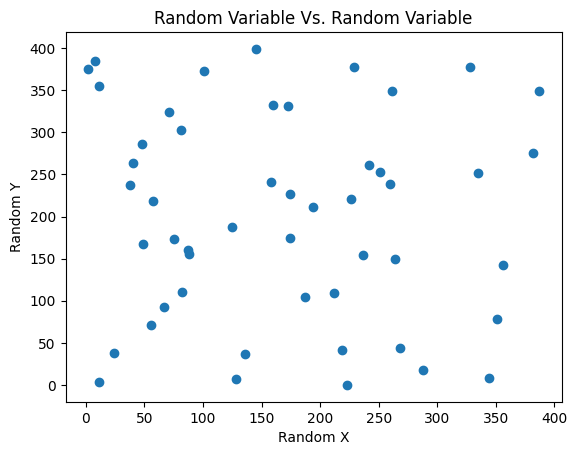

In [16]:
x_range = np.random.randint(400, size=50)
y_range = np.random.randint(400, size=50)

plt.scatter(x_range, y_range)
plt.title("Random Variable Vs. Random Variable")
plt.xlabel("Random X")
plt.ylabel("Random Y")
plt.show()


#### **Problem #2.1.2**

Given the following scatter plot, add the following labels and title:
* `Title`: "Distance vs Workout Duration"
* `X-axis`: "Distance (km)"
* `Y-axis`: "Workout Duration (min)"

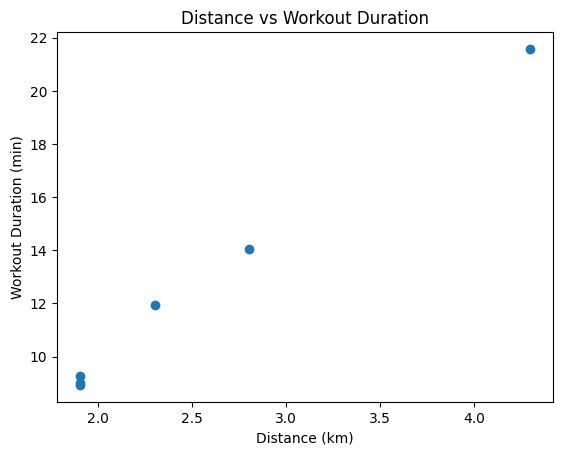

In [18]:
workout_df = pd.DataFrame({"date": ["10/17/21", "11/04/21", "11/18/21", "11/23/21", "11/28/21", "11/29/21"],
           "distance_km": [4.3, 1.9, 1.9, 1.9, 2.3, 2.8],
           "duration_min": [21.58, 9.25, 9.0, 8.93, 11.94, 14.05],
           "delta_last_workout":[1, 18, 14, 5, 5, 1],
           "day_category": [0, 1, 1, 0, 0, 0]})


plt.scatter(workout_df['distance_km'], workout_df['duration_min'])
plt.title("Distance vs Workout Duration")
plt.xlabel("Distance (km)")
plt.ylabel("Workout Duration (min)")
plt.show()


#### **Problem #2.1.3**

Create a scatter plot for the following data. Make the title and labels the following:
* `Title`: "Age vs. height in teenagers"
* `X-axis`: "Age"
* `Y-axis`: "Height (in)"

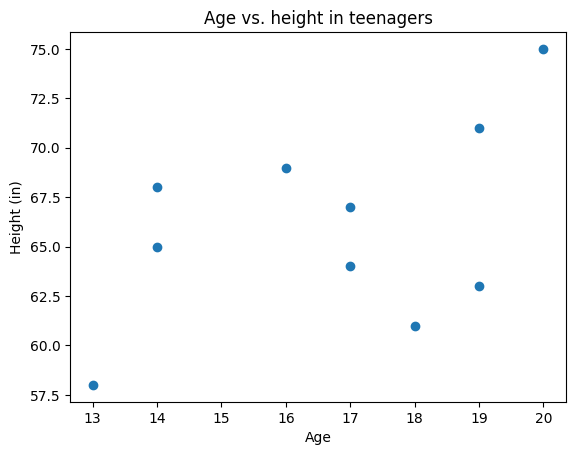

In [20]:
age = [14, 14, 13, 18, 17, 20, 17, 16, 19, 19]
height = [65, 68, 58, 61, 64, 75, 67, 69, 71, 63] #in inches
plt.scatter(age, height)
plt.title("Age vs. height in teenagers")
plt.xlabel("Age")
plt.ylabel("Height (in)")
plt.show()



<a name="p2.2"></a>

---
### **Part 2.2: Line Plots**
---

#### **Problem #2.2.1**

Create a line plot for the following data. Add a title called "Bike Rideshare Activity" with x-axis and y-axis labels called "Month" and "Bike Trips", respectively.

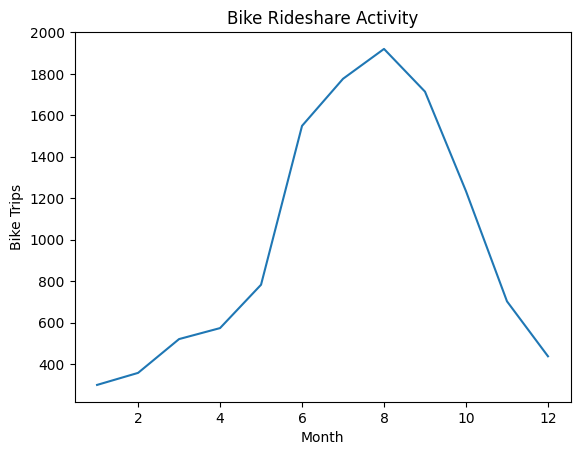

In [21]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
trips = [300, 358, 521, 574, 783, 1549, 1776, 1920, 1714, 1234, 703, 438]

plt.plot(months, trips)
plt.title("Bike Rideshare Activity")
plt.xlabel("Month")
plt.ylabel("Bike Trips")
plt.show()


#### **Problem #2.2.2**

Create a line plot for the following data. Add a title called "Unemployment rate over the years" with x-axis and y-axis labels called "Year" and "Unemployment", respectively.

In [22]:
Year = [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]
Unemployment_Rate = [9.8,12,8,7.2,6.9,7,6.5,6.2,5.5,6.3]

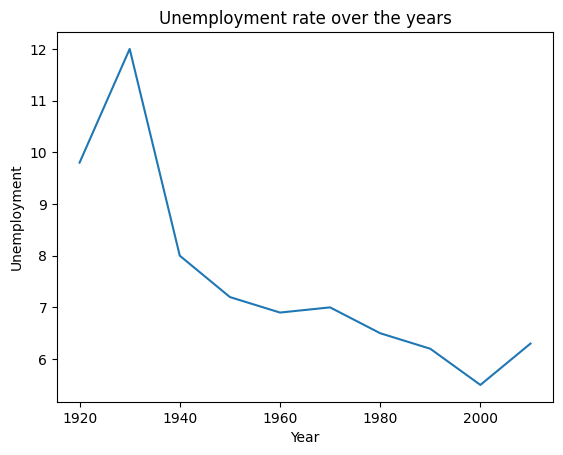

In [23]:
plt.plot(Year, Unemployment_Rate)
plt.title("Unemployment rate over the years")
plt.xlabel("Year")
plt.ylabel("Unemployment")
plt.show()

#### **Problem #2.2.3**

The information below contains data related to how many people have visited Disney parks globally. Create a line plot to show how the number of visits have changed between 2017 to 2020. Make sure you add in helpful labels and a title.

**Note:** Visitors is in millions. For example, in 2017, 150 million people visited Disney parks globally.

In [24]:
year = [2017, 2018, 2019, 2020]
visitors = [150, 157, 155.991, 43.525]

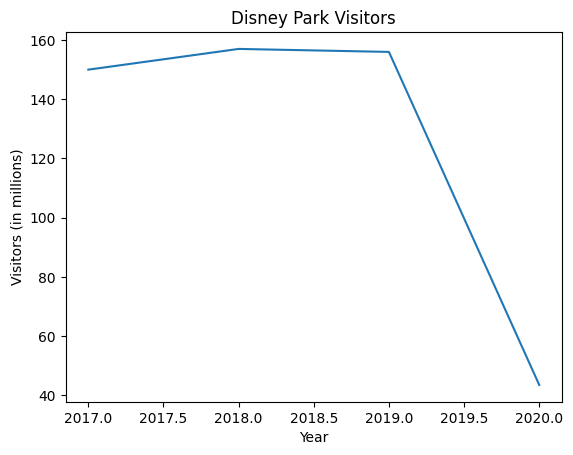

In [26]:
plt.plot(year, visitors)
plt.title("Disney Park Visitors")
plt.xlabel("Year")
plt.ylabel("Visitors (in millions)")
plt.show()


<a name="p2.3"></a>

---
### **Part 2.3: Bar Plots**
---

#### **Problem #2.3.1**

Now, plot the same data as above, but using a bar plot. In some cases, it may not be clear which plot will be best until you see your options!

In [27]:
year = ['2017', '2018', '2019', '2020']
visitors = [150, 157, 155.991, 43.525]

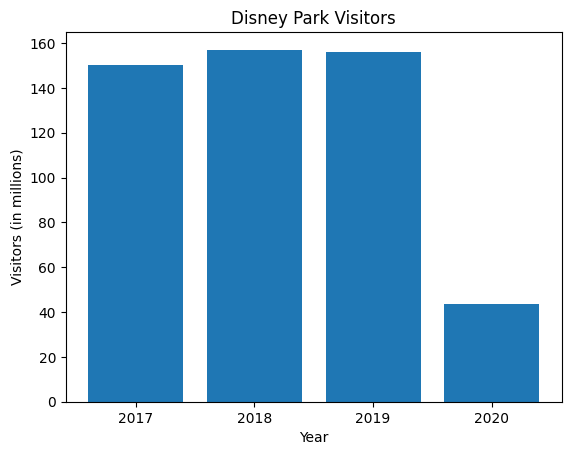

In [28]:
plt.bar(year, visitors)
plt.title("Disney Park Visitors")
plt.xlabel("Year")
plt.ylabel("Visitors (in millions)")
plt.show()


#### **Problem #2.3.2**

Create a bar plot for the following data. Add a title called "Favorite Types of Drinks" with x-axis and y-axis labels called "Drink" and "Number of People", respectively.

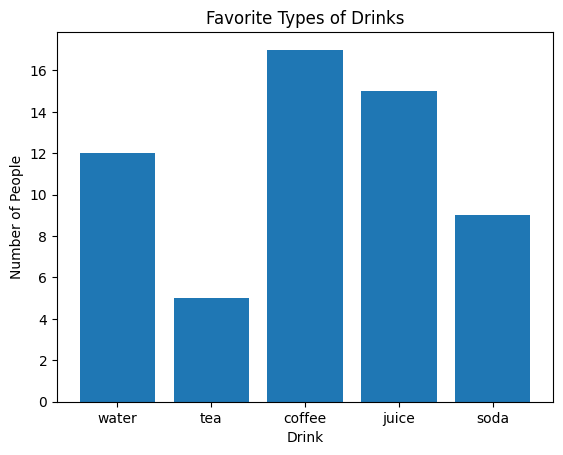

In [30]:
drinks = ["water", "tea", "coffee", "juice", "soda"]
people = [12, 5, 17, 15, 9]

plt.bar(drinks, people)
plt.title("Favorite Types of Drinks")
plt.xlabel("Drink")
plt.ylabel("Number of People")
plt.show()


#### **Problem #2.3.3**

Create a bar plot using the DataFrame below. Add labels: `Innovative companies` for the title, `Countries` for the x-axis label, and `Number of Companies` for the y-axis label.

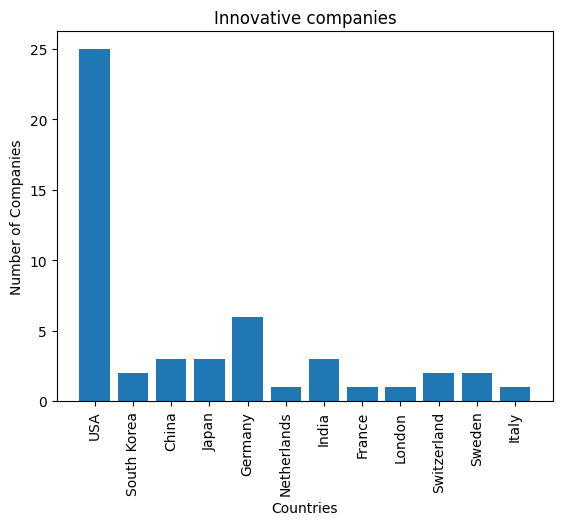

In [32]:
companies_df = pd.DataFrame({"countries": ["USA", "South Korea", "China", "Japan", "Germany", "Netherlands", "India", "France", "London", "Switzerland", "Sweden", "Italy"],
             "companies": [25, 2, 3, 3, 6, 1, 3, 1, 1, 2, 2, 1]})

companies_df.head()

plt.bar(companies_df['countries'], companies_df['companies'])
plt.title("Innovative companies")
plt.xlabel("Countries")
plt.ylabel("Number of Companies")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

<a name="p2.4"></a>

---
### **Part 2.4: Improving Visualizations [OPTIONAL]**
---

#### **Problem #2.4.1**

Using the following data, create a line plot.

**Hint:** Your graph should have three distinct lines corresponding to `y1`, `y2`, and `y3`.

In addition:
* Make sure each line is a different color
* Make `y1` a dashed line
* Add a grid to the background and make the background color black
* Add a legend

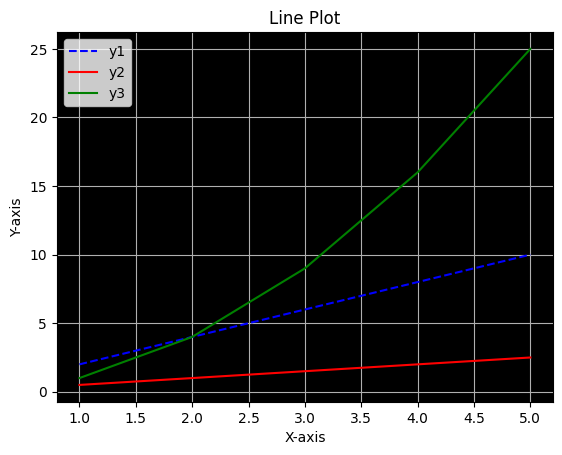

In [34]:
# x axis values
x = [1,2,3,4,5]
# corresponding y axis values
y1 = [2,4,6,8,10] # y = 2x
y2 = [0.5,1,1.5,2,2.5] # y = 0.5x
y3 = [1,4,9,16,25] # y = x^2

# Create the line plot
plt.plot(x, y1, color='blue', linestyle='dashed', label='y1')  # Dashed blue line for y1
plt.plot(x, y2, color='red', label='y2')  # Red line for y2
plt.plot(x, y3, color='green', label='y3')  # Green line for y3

# Customize the plot
plt.grid(True)  # Add a grid
plt.title('Line Plot')  # Add a title
plt.xlabel('X-axis')  # Add an x-axis label
plt.ylabel('Y-axis')  # Add a y-axis label
plt.legend()  # Add a legend

ax = plt.gca()
ax.set_facecolor('black')  # Set background color to black

# Show the plot
plt.show()

#### **Problem #2.4.2**

Using the following data, create a scatter plot. In addition:
* Make the data points green
* Change the transparency to 0.6
* Make the x-label `Temperature (Fahrenheit)` and in the font `fantasy`
* Make the y-label `Number of People` and in the font `fantasy`
* Make the title `Number of People at the Beach` and in the font `fantasy`

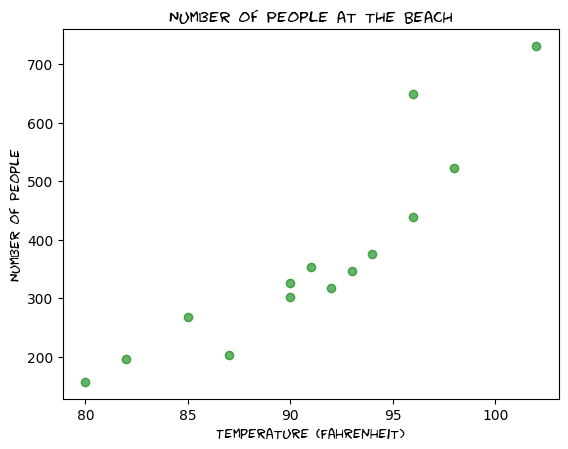

In [36]:
# x axis values
x = [87, 94, 98, 102, 96, 90, 92, 93, 85, 82, 96, 80, 90, 91]
# corresponding y axis values
y = [204, 375, 522, 731, 439, 302, 317, 346, 268, 197, 649, 158, 327, 353]

plt.scatter(x, y, color='green', alpha=0.6)
plt.xlabel('Temperature (Fahrenheit)', fontname='fantasy')
plt.ylabel('Number of People', fontname='fantasy')
plt.title('Number of People at the Beach', fontname='fantasy')
plt.show()


#### **Problem #2.4.3**

Using the following data, create a bar plot. In addition:
* Make each bar's color the same as the color name
* Make the x-label `Favorite Color` and with a font size of 12
* Make the y-label `Number of People` and with a font size of 12
* Make the title `Number of People vs Favorite Color` and with a font size of 20
* Make the bar width 0.6

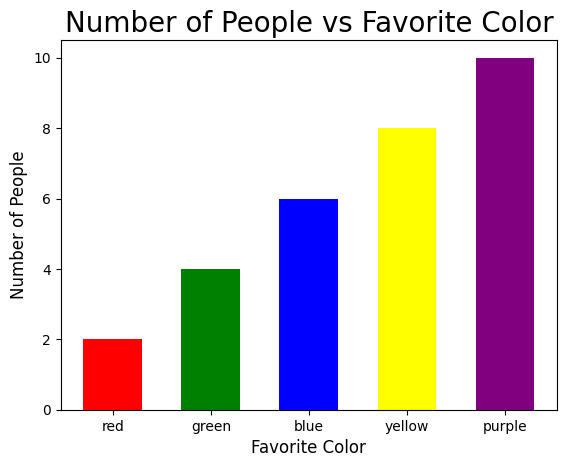

In [38]:
# x axis values
x = [1,2,3,4,5]
# corresponding y axis values
y1 = [2,4,6,8,10]
y2 = [0.5,1,1.5,2,2.5]
y3 = [1,4,9,16,25]

# Sample data (replace with your actual data)
x = ['red', 'green', 'blue', 'yellow', 'purple']
y = [2, 4, 6, 8, 10]

# Create the bar plot
plt.bar(x, y, color=x, width=0.6)  # Set bar colors to match color names

# Customize the plot
plt.xlabel('Favorite Color', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.title('Number of People vs Favorite Color', fontsize=20)

# Show the plot
plt.show()


#### **Problem #2.4.4**

Using the following data, create a line plot. In addition:
* Make line y1 brown and dashed, and make line y2 pink
* Add a grid to the background
* Add a legend
* Make the title `X vs Y` in font `monospace` and in size 18


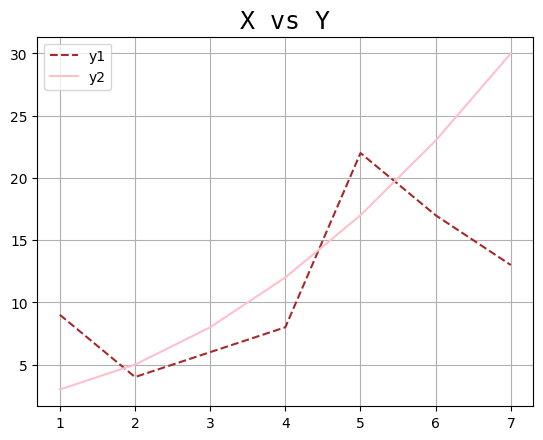

In [40]:
# x axis values
x = [1,2,3,4,5,6,7]
# corresponding y axis values
y1 = [9, 4, 6, 8, 22, 17, 13]
y2 = [3, 5, 8, 12, 17, 23, 30]

plt.plot(x, y1, color='brown', linestyle='dashed', label='y1')
plt.plot(x, y2, color='pink', label='y2')

plt.grid(True)  # Add a grid to the background
plt.legend()  # Add a legend

plt.title('X vs Y', fontname='monospace', fontsize=18)  # Title with font and size

plt.show()


#### **Problem #2.4.5**

Create a bar plot for the following data with the following:
* One bar showing the number of females in the dataset and another bar showing the number of males in the dataset.
* Bars labeled 'Female' and 'Male'.
* The y-axis labeled 'Number in Dataset' with extra large font.
* A title called "Number of Males and Females in the Dataset" with extra large font.

<br>

**Hint**: You will need to use pandas functions to get the count of males and females in the data frame.

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'heart attack'],
      dtype='object')


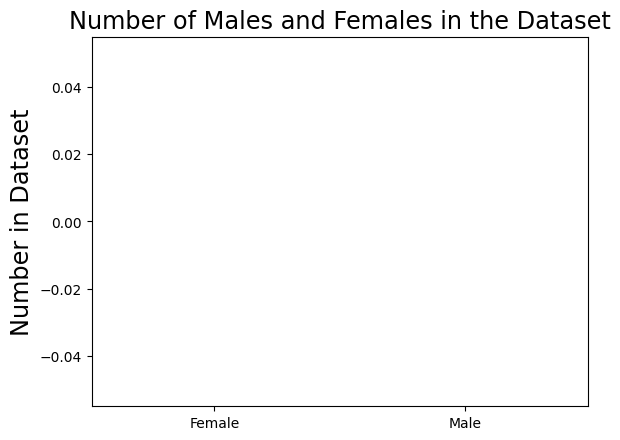

In [47]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSa0metcKBFqn-MHLn05vVGWONMlzljcWa-xIM1wJPXIa5kbrmIzGqmWcMh8eKG_ntByF9qqn6Mx3MT/pub?gid=1052859518&single=true&output=csv'
df = pd.read_csv(url)
df.head()

# Check the actual column names in the DataFrame
print(df.columns)

# Assuming the column is named 'sex' instead of 'Sex'
# Count the number of males and females
# Accessing the counts using the correct keys
# and separating assignments for female_count and male_count
female_count = df['sex'].value_counts().get('female', 0)
male_count = df['sex'].value_counts().get('male', 0)

# Create the bar plot
plt.bar(['Female', 'Male'], [female_count, male_count])

# Customize the plot
plt.ylabel('Number in Dataset', fontsize='xx-large')
plt.title('Number of Males and Females in the Dataset', fontsize='xx-large')

# Show the plot
plt.show()

#### **Problem #2.4.6**

Create a *grouped* bar plot for the following data with the following:
* One bar graph showing the number of females with heart attacks and without in the dataset.
* This bar graph should be labeled 'Female' for the legend.
* Another bar graph showing the number of males with heart attacks and without in the dataset.
* This bar graph should be labeled 'Male' for the legend.
* Both bar graphs should be located on the x-axis and given a width to make the graph readable.
* The y-axis labeled 'Number in Dataset' with extra large font.
* A title called "Breakdown of Heart Attacks by Sex" with extra large font.

<br>

**Hint**: You will need to use pandas functions and comparisons to get the count of males and females with and without heart attacks in the data frame.

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'heart attack'],
      dtype='object')
Column 'target' not found in the DataFrame. Check column names.


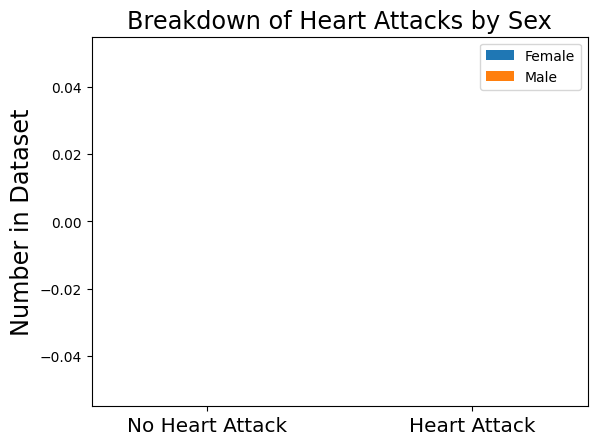

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSa0metcKBFqn-MHLn05vVGWONMlzljcWa-xIM1wJPXIa5kbrmIzGqmWcMh8eKG_ntByF9qqn6Mx3MT/pub?gid=1052859518&single=true&output=csv'
df = pd.read_csv(url)

# Check if 'sex' and 'target' columns exist
print(df.columns)

# Assuming the columns are named 'sex' and 'target'
df_female = df[df['sex'] == 'female']  # Filter for females
df_male = df[df['sex'] == 'male']  # Filter for males

# Calculate counts for each group, handling potential KeyError
try:
    female_no_attack = len(df_female[df_female['target'] == 0])
    female_attack = len(df_female[df_female['target'] == 1])
    male_no_attack = len(df_male[df_male['target'] == 0])
    male_attack = len(df_male[df_male['target'] == 1])
except KeyError:
    print("Column 'target' not found in the DataFrame. Check column names.")
    # You might need to replace 'target' with the actual column name
    # or handle the missing column in a different way.
    female_no_attack, female_attack, male_no_attack, male_attack = 0, 0, 0, 0  # Assign default values

# Create grouped bar plot
bar_width = 0.35
index = np.arange(2)  # Two categories: No Heart Attack, Heart Attack

plt.bar(index, [female_no_attack, female_attack], bar_width, label='Female')
plt.bar(index + bar_width, [male_no_attack, male_attack], bar_width, label='Male')

# Customize the plot
plt.ylabel('Number in Dataset', fontsize='xx-large')
plt.title('Breakdown of Heart Attacks by Sex', fontsize='xx-large')
plt.xticks(ticks=index + bar_width / 2, labels=['No Heart Attack', 'Heart Attack'], fontsize='x-large')
plt.legend()

plt.show()

#### **Comment on this Dataset**

This is an unfortunately common case of biased data, specifically *unbalanced data*, leading to potentially harmful results. We could attempt removing `'Sex'` as a feature to blind any ML models to the sex of the patient. However, bias often runs deeper than the most superficial variables and may be correlated with others in ways that humans and especially advanced ML algorithms can still pick up on. Consider some of the following ideas for improving on these results:

* Using statistical methods for balancing the data. For instance, upsampling and downsampling are common first approaches to tackling this problem.

* Find a dataset that is more balanced to begin with. In an ideal world, we would make sure that the data is balanced (representative) upon collection.

<a name="p3"></a>

---
## **Part 3: Linear Regression**
---

Using the  dataset, do the following:
* Build a model that can predict the total number of bike rentals.
* Use a different subset of features to build another model to predict the total number of bike rentals and compare the results.

<br>

The Bike Sharing dataset contains information about hourly bike rental data spanning two years, provided by a bike-sharing system in Washington, D.C. The dataset includes factors such as weather, date, time, and user information.

The features are as follows:
* `instant`: A unique identifier for each record in the dataset.
* `dteday`: The date of the bike rental in the format yyyy-mm-dd.
* `season`: The season of the year (1: spring, 2: summer, 3: fall, 4: winter).
* `yr`: The year (0: 2011, 1: 2012).
* `mnth`: The month of the year (1 to 12).
* `hr`: The hour of the day (0 to 23).
* `holiday`: A binary indicator of whether it is a holiday or not (0: not a holiday, 1: holiday).
* `weekday`: The day of the week (0: Sunday, 1: Monday, ..., 6: Saturday).
* `workingday`: A binary indicator of whether it is a working day or not (0: weekend or holiday, 1: working day).
* `weathersit`: The weather situation (1: clear, 2: misty/foggy, 3: light rain/snow, 4: heavy rain/snow).
* `temp`: The temperature in Celsius.
* `atemp`: The "feels like" temperature in Celsius.
* `hum`: The humidity level.
* `windspeed`: The wind speed.
* `casual`: The count of casual bike rentals.
* `registered`: The count of registered bike rentals.
* `cnt`: The total count of bike rentals (casual + registered).

#### **Step #1: Load in Data**

**Run the code below to load the data.**

In [63]:
# Import required libraries
import urllib.request
import zipfile

# Download the zip file and extract the CSV file(s)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
filename = "Bike-Sharing-Dataset.zip"
urllib.request.urlretrieve(url, filename)
with zipfile.ZipFile(filename, "r") as zip_ref:
    zip_ref.extractall()

# Read the CSV file(s) into Pandas dataframes
hour_df = pd.read_csv("hour.csv")
day_df = pd.read_csv("day.csv")

# Combine the two dataframes into a single dataframe
bikes_df = pd.concat([hour_df, day_df], ignore_index=True).drop(columns = ['instant', 'dteday', 'casual', 'hr'])




#### **Step #2: Choose your Variables**

We are using all available features to predict `cnt`.


In [64]:
inputs = bikes_df.drop(columns=['cnt'], axis=1)
output = bikes_df['cnt']


#### **Step #3: Split your Data**


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.2, random_state=42)

#### **Step #4: Import an ML Algorithm**




In [88]:

# from sklearn.linear_model import LogisticRegression  # Add this if you want to explore Logistic Regression later


#### **Step #5: Initialize the Model**


In [92]:
model = LinearRegression() # COMPLETE THIS CODE

#### **Step #6: Fit, Test, and Visualize**


In [116]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [115]:
predictions = predictions

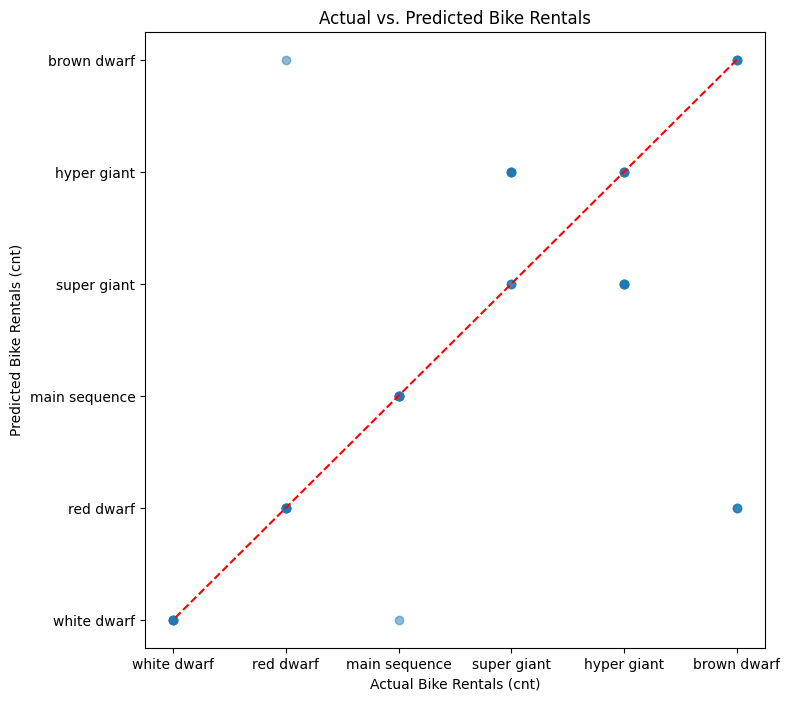

In [124]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions, alpha=0.5)  # Now use the correct predictions
plt.xlabel("Actual Bike Rentals (cnt)")
plt.ylabel("Predicted Bike Rentals (cnt)")
plt.title("Actual vs. Predicted Bike Rentals")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

#### **Step #7: Evaluate**

Let's evaluate this model and put it to the test! Specifically, evaluate the model using our standard regression metrics: $R^2$, MSE, and MAE.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Create sample data
X, y = make_regression(n_samples=100, n_features=1, noise=0.1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print metrics
print("R2 Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


R2 Score: 0.9999982984263776
Mean Squared Error (MSE): 0.009147407791404527
Mean Absolute Error (MAE): 0.08461381370842676


#### **Step #1: Load in Data**

**Run the code below to load the data.**

In [4]:
import pandas as pd # import the pandas library and assign it to the variable 'pd'
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTCZgoegOHa49SFXYU-ZZTdCkgTp0sneU1BsEOa7vusjTXPPLcn0i3kXhX1nyqkApJHCKTkw0mWuWr4/pub?gid=753880827&single=true&output=csv'
stars_df = pd.read_csv(url)

# Convert class values to more meaningful labels
star_map = {0: 'red dwarf', 1: 'brown dwarf', 2: 'white dwarf', 3: 'main sequence', 4: 'super giant', 5: 'hyper giant'}
stars_df['class'] = stars_df['class'].map(star_map)

# Encode color feature so we can use it in our modeling
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
stars_df['color'] = enc.fit_transform(stars_df[['color']]).astype(int)



stars_df.head()

,temperature,brightness,size,color,class
0,3068,0.002400,0.1700,8,red dwarf
1,3042,0.000500,0.1542,8,red dwarf
2,2600,0.000300,0.1020,8,red dwarf
3,2800,0.000200,0.1600,8,red dwarf
4,1939,0.000138,0.1030,8,red dwarf


#### **Step #2: Choose your Variables**



In [5]:
inputs = stars_df.drop(columns=['class'], axis=1)  # Correct
output = stars_df['class']  # Correct
inputs

,temperature,brightness,size,color
0,3068,0.002400,0.1700,8
1,3042,0.000500,0.1542,8
2,2600,0.000300,0.1020,8
3,2800,0.000200,0.1600,8
4,1939,0.000138,0.1030,8
...,...,...,...,...
235,38940,374830.000000,1356.0000,0
236,30839,834042.000000,1194.0000,0
237,8829,537493.000000,1423.0000,9
238,9235,404940.000000,1112.0000,9


#### **Step #3: Split your Data**


In [7]:
from sklearn.model_selection import train_test_split # Import the train_test_split function directly

X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.2, random_state=42)

#### **Step #4: Import an ML Algorithm**




In [8]:
# COMPLETE THIS CODE
from sklearn.neighbors import KNeighborsClassifier

#### **Step #5: Initialize the Model**

Use K = 5 here.

In [9]:
model = KNeighborsClassifier(n_neighbors=5)# COMPLETE THIS CODE

#### **Step #6: Fit and Test**


In [11]:
# Train the model (Fit)
#model = LinearRegression()  # Replace with your model, e.g., LinearRegression, DecisionTree, etc.
model = KNeighborsClassifier(n_neighbors=5) # Use the KNeighborsClassifier you initialized earlier
model.fit(X_train, y_train)  # Fit the model to the training data

# Test the model (Predict)
y_pred = model.predict(X_test)  # Generate predictions on the test set

In [12]:
predictions = model.predict(X_test)# COMPLETE THIS CODE

#### **Step #7: Evaluate**

Let's evaluate this model and put it to the test! Specifically, use the accuracy score to get a simple overall picture of your model's performance, and the confusion matrix to get a more nuanced view of where the model is performing the best and worst


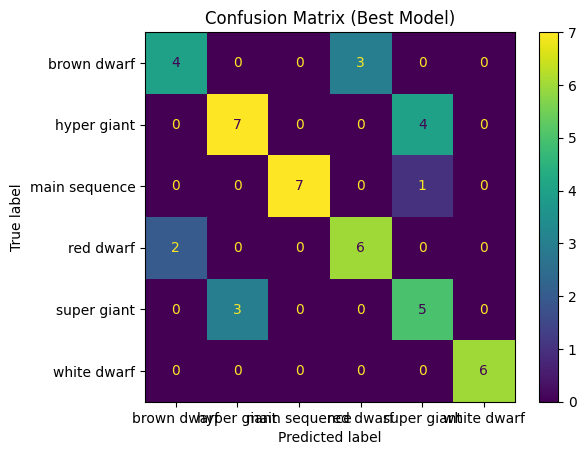

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Import the necessary functions
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt # Import matplotlib.pyplot as plt


# ... (rest of your code) ...

# (Optional: You can also get the confusion matrix for the best model)
predictions_best = best_model.predict(X_test)
cm_best = confusion_matrix(y_test, predictions_best, labels=best_model.classes_)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=best_model.classes_)
disp_best.plot()
plt.title("Confusion Matrix (Best Model)") # Now plt is defined
plt.show()

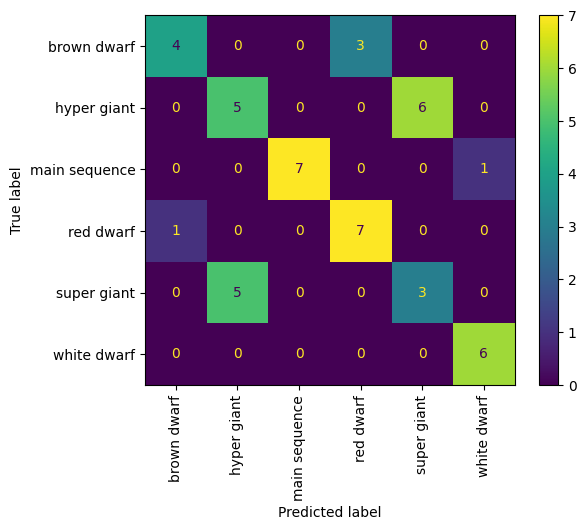

In [16]:
#cm = confusion_matrix(# COMPLETE THIS CODE
#disp = ConfusionMatrixDisplay(# COMPLETE THIS CODE
cm = confusion_matrix(y_test, predictions, labels=model.classes_)# COMPLETE THIS CODE
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

plt.xticks(rotation=90)
plt.show()

#### **Step \#8: Make predictions**


Astronomers have heard of your amazing ML model for predicting star types and want you to help them categorize new stars they have observed! For each problem below, use your KNN model to classify the stars based on the data given to you.


The stars' `temperature`, `brightness`, `size`, and `color` are as follows:

1. `10500`, `107200`, `240`, `6`.

2. `10500`, `107200`, `240`, `0`.

3. `1900`, `0.0001`, `0.01`, `3`.

4. `9000`, `100`, `10`, `3`.

In [17]:
new_star1 = pd.DataFrame([[10500, 107200, 240, 6]], columns=X_train.columns)
new_pred1 = model.predict(new_star1)
print(f"Star 1 Predicted Class (numerical): {new_pred1[0]}")
print(f"Star 1 Predicted Star Type: {star_map.get(new_pred1[0], 'Unknown')}")


Star 1 Predicted Class (numerical): hyper giant
Star 1 Predicted Star Type: Unknown


In [18]:
new_star2 = pd.DataFrame([[10500, 107200, 240, 0]], columns=X_train.columns)
new_pred2 = model.predict(new_star2)
print(f"Star 2 Predicted Class (numerical): {new_pred2[0]}")
print(f"Star 2 Predicted Star Type: {star_map.get(new_pred2[0], 'Unknown')}")


Star 2 Predicted Class (numerical): hyper giant
Star 2 Predicted Star Type: Unknown


In [19]:
new_star3 = pd.DataFrame([[1900, 0.0001, 0.01, 3]], columns=X_train.columns)
new_pred3 = model.predict(new_star3)
print(f"Star 3 Predicted Class (numerical): {new_pred3[0]}")
print(f"Star 3 Predicted Star Type: {star_map.get(new_pred3[0], 'Unknown')}")

Star 3 Predicted Class (numerical): red dwarf
Star 3 Predicted Star Type: Unknown


In [20]:
new_star4 = pd.DataFrame([[9000, 100, 10, 3]], columns=X_train.columns)
new_pred4 = model.predict(new_star4)
print(f"Star 4 Predicted Class (numerical): {new_pred4[0]}")
print(f"Star 4 Predicted Star Type: {star_map.get(new_pred4[0], 'Unknown')}")

Star 4 Predicted Class (numerical): main sequence
Star 4 Predicted Star Type: Unknown


#### **NOTE**: We encourage you to try working through this section with logistic regression too.

---
#End of Notebook

© 2024 The Coding School, All rights reserved